# Factoring and period finding

In [1]:
import numpy as np
from qiskit import QuantumCircuit
import sys
np.set_printoptions(threshold=sys.maxsize)
import pandas as pd
from fractions import Fraction

In [2]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram

Directly prepare the Quantum state, instead of using modular exponentiation

In [3]:
def get_coeffs(x, N, n_q, n_count):
    vec = np.zeros(2**n_q)
    base = 1
    for i in range(2**n_count):
        s1 = np.binary_repr(i,n_count)
        mod2 = np.mod(base,N)
        base = mod2*x
        s2 = np.binary_repr(mod2,n_q-n_count)
        print(i,mod2,s1,s2)
        vec[int(s2+s1,2)] = 1
    return vec

Quantum Fourier transform

In [4]:
def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circ"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc

## Example: x=3, N=15

In [15]:
x = 3
N = 15
n_q = 10 # total number of Qubits (QFT_register + a**i_register)
n_count = 4 # number of qubits of QFT_register

In [16]:
vec = get_coeffs(x, N, n_q, n_count)

0 1 0000 000001
1 3 0001 000011
2 9 0010 001001
3 12 0011 001100
4 6 0100 000110
5 3 0101 000011
6 9 0110 001001
7 12 0111 001100
8 6 1000 000110
9 3 1001 000011
10 9 1010 001001
11 12 1011 001100
12 6 1100 000110
13 3 1101 000011
14 9 1110 001001
15 12 1111 001100


In [17]:
vec = np.multiply(vec, 1/np.sqrt(2**n_count))
print(vec)

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.25 0.   0.   0.   0.25 0.   0.
 0.   0.25 0.   0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.25 0.   0.   0.   0.25 0.   0.   0.   0.25 0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.25 0.   0.   0.   0.25 0.   0.   0.
 0.25 0.   0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.25
 0.   0.   0.   0.25 0.   0.   0

### Start simulation: (using i.e. Qiskit)

In [18]:
Q = QuantumCircuit(n_q,n_count)

In [19]:
Q.initialize(vec)

In [20]:
Q.append(qft_dagger(n_count),range(n_count))
Q.measure(range(n_count),range(n_count))
Q.draw(fold=-1)  # -1 means 'do not fold'

┌──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐┌───────┐┌─┐         
q_0: ┤0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

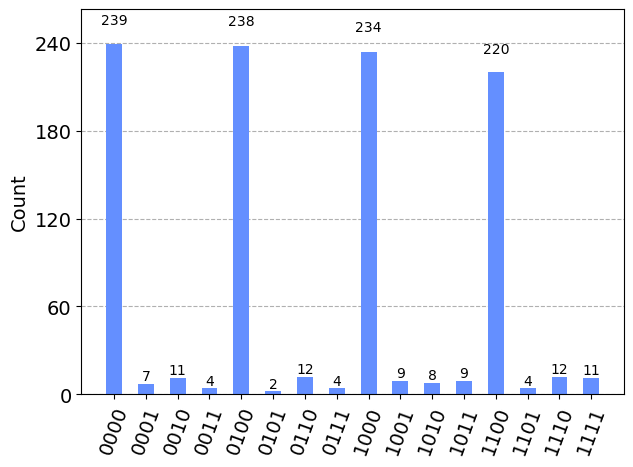

In [21]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(Q, aer_sim)
qobj = assemble(t_qc)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

Compute the continuous fraction, and obtain from there the candidate factors

In [23]:
rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**n_count)  # Find corresponding eigenvalue
    measured_phases.append(phase)
    # Add these values to the rows in our table:
    frac = Fraction(phase).limit_denominator(N)
    #rows.append([f"{output}(bin) = {decimal:>3}(dec)", f"{decimal}/{2**n_count} = {phase:.2f}",f"{frac.numerator}/{frac.denominator}", frac.denominator, np.gcd(x**(frac.denominator//2)-1, N), np.gcd(x**(frac.denominator//2)+1, N)])
    rows.append([f"{output}(bin) = {decimal:>3}(dec)", f"{frac.numerator}/{frac.denominator}", frac.denominator, np.gcd(x**(frac.denominator//2)-1, N), np.gcd(x**(frac.denominator//2)+1, N)])
# Print the rows in a table
#headers=["Register Output", "Phase", "Fraction", "Guess for r", "guess1","guess2"]
headers=["Register Output", "Fraction", "Guess for r", "guess1","guess2"]
df = pd.DataFrame(rows, columns=headers)
print(df)

         Register Output Fraction  Guess for r  guess1  guess2
0   0111(bin) =   7(dec)      4/9            9       5       1
1   1011(bin) =  11(dec)     9/13           13       1       5
2   1101(bin) =  13(dec)     9/11           11       1       1
3   1111(bin) =  15(dec)    14/15           15       1       1
4   1010(bin) =  10(dec)      5/8            8       5       1
5   1001(bin) =   9(dec)      5/9            9       5       1
6   0001(bin) =   1(dec)     1/15           15       1       1
7   0011(bin) =   3(dec)     2/11           11       1       1
8   0101(bin) =   5(dec)     4/13           13       1       5
9   1110(bin) =  14(dec)      7/8            8       5       1
10  1000(bin) =   8(dec)      1/2            2       1       1
11  1100(bin) =  12(dec)      3/4            4       1       5
12  0100(bin) =   4(dec)      1/4            4       1       5
13  0110(bin) =   6(dec)      3/8            8       5       1
14  0010(bin) =   2(dec)      1/8            8       5 